<a href="https://colab.research.google.com/github/Rehab-Yasser/Linear_Regression/blob/main/linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Housing.csv")

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
len(df.columns)

13

In [ ]:
len(df)

545

In [ ]:
for col in df.columns:
  print ("column : " , df[col].unique())
  print(df[col].value_counts().nlargest(5))

column :  [13300000 12250000 12215000 11410000 10850000 10150000  9870000  9800000
  9681000  9310000  9240000  9100000  8960000  8890000  8855000  8750000
  8680000  8645000  8575000  8540000  8463000  8400000  8295000  8190000
  8120000  8080940  8043000  7980000  7962500  7910000  7875000  7840000
  7700000  7560000  7525000  7490000  7455000  7420000  7350000  7343000
  7245000  7210000  7140000  7070000  7035000  7000000  6930000  6895000
  6860000  6790000  6755000  6720000  6685000  6650000  6629000  6615000
  6580000  6510000  6475000  6440000  6419000  6405000  6300000  6293000
  6265000  6230000  6195000  6160000  6125000  6107500  6090000  6083000
  6020000  5950000  5943000  5880000  5873000  5866000  5810000  5803000
  5775000  5740000  5652500  5600000  5565000  5530000  5523000  5495000
  5460000  5425000  5390000  5383000  5320000  5285000  5250000  5243000
  5229000  5215000  5145000  5110000  5075000  5040000  5033000  5005000
  4970000  4956000  4935000  4907000  490

In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
df.describe(include=("O"))

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


<Axes: xlabel='price', ylabel='Count'>

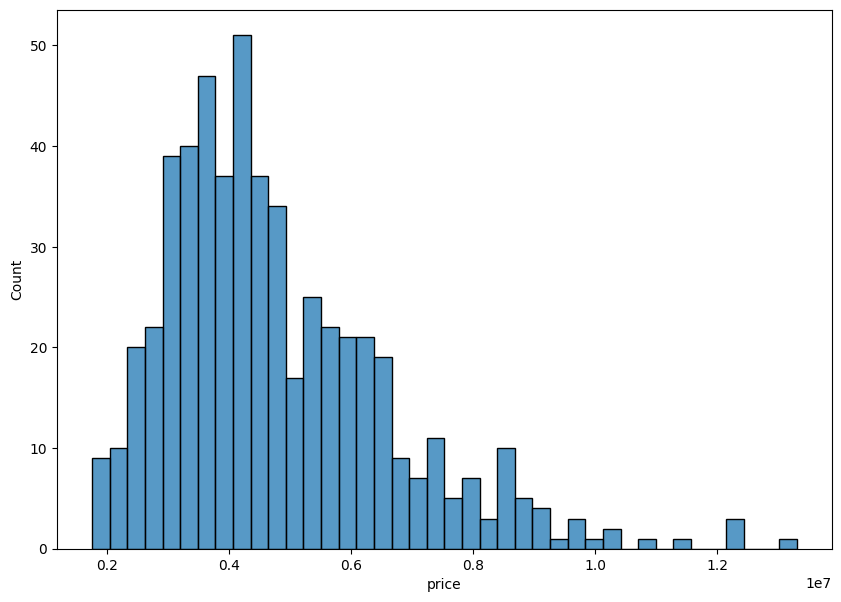

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(df.price,bins=40)


<class 'pandas.core.frame.DataFrame'>


<Axes: xlabel='price_log', ylabel='Count'>

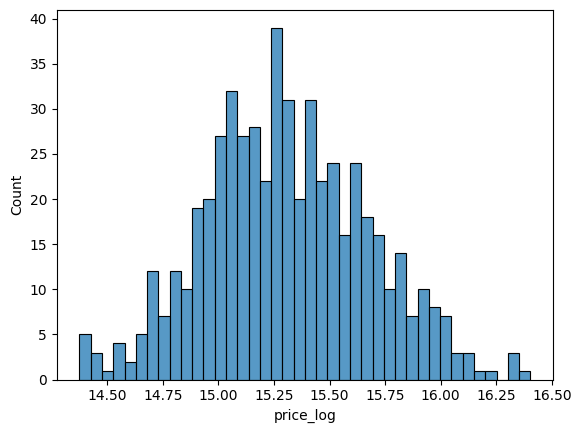

In [ ]:
print(type(df))
df['price_log']=np.log1p(df.price)
sns.histplot(df.price_log, bins=40)

In [ ]:
np.random.seed(2)
n=len (df)
n_test= int(.2*n)
n_val= int(.2*n)
n_train= int(n-(n_test+n_val))
print(n,n_test,n_val,n_train)

545 109 109 327


In [ ]:
idx=np.arange(n)
print(idx)
np.random.shuffle(idx)
print (idx)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [ ]:
df_shuffle=df.iloc[idx]
print (df.index)
print (df_shuffle.index)

RangeIndex(start=0, stop=545, step=1)
Index([333,  84, 439, 396, 161, 399, 130, 347, 425, 393,
       ...
       433, 263, 360,  75, 466, 299, 534, 493, 527, 168],
      dtype='int64', length=545)


In [ ]:
df_train=df_shuffle.iloc[:n_train].copy()
df_val=df_shuffle.iloc[n_train:n_train+n_val].copy()
df_test=df_shuffle.iloc[n_train+n_val:].copy()
df_train

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_log
333,3920000,3000,3,1,2,yes,no,no,no,no,0,no,semi-furnished,15.181602
84,6510000,3760,3,1,2,yes,no,no,yes,no,2,no,semi-furnished,15.688850
439,3255000,3930,2,1,1,no,no,no,no,no,0,no,unfurnished,14.995703
396,3500000,3640,2,1,1,yes,no,no,no,no,1,no,semi-furnished,15.068274
161,5460000,6100,3,1,3,yes,yes,no,no,yes,0,yes,semi-furnished,15.512960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,6475000,3960,3,1,1,yes,no,yes,no,no,2,no,semi-furnished,15.683459
64,7000000,11175,3,1,1,yes,no,yes,no,yes,1,yes,furnished,15.761421
270,4340000,4500,3,2,3,yes,no,no,yes,no,1,no,furnished,15.283385
93,6300000,7200,3,2,1,yes,no,yes,no,yes,3,no,semi-furnished,15.656060


In [ ]:
y_train = df_train['price_log'].values
y_val = df_val['price_log'].values
y_test = df_test['price_log'].values

In [ ]:
def prepare_x (df):
  df=df.copy()
  features=['area','price','price_log','bedrooms','bathrooms','stories','parking']
  for v in ['yes','no']:
    feature='hotwaterheating%s' % v
    df[feature]=(df['hotwaterheating']==v).astype(int)
    features.append(feature)
  for v in ['yes','no']:
    feature='mainroad%s' % v
    df[feature]=(df['mainroad']==v).astype(int)
    features.append(feature)
  for v in ['yes','no']:
    feature='guestroom%s' % v
    df[feature]=(df['guestroom']==v).astype(int)
    features.append(feature)
  for v in ['yes','no']:
    feature='basement%s' % v
    df[feature]=(df['basement']==v).astype(int)
    features.append(feature)
  for v in ['yes','no']:
    feature='airconditioning%s' % v
    df[feature]=(df['airconditioning']==v).astype(int)
    features.append(feature)
  for v in ['yes','no']:
    feature='prefarea%s' % v
    df[feature]=(df['prefarea']==v).astype(int)
    features.append(feature)
  for v in ['furnished','semi-furnished','unfurnished']:
    feature='furnishingstatus%s' % v
    df[feature]=(df['furnishingstatus']==v).astype(int)
    features.append(feature)

  return df[features]


<Axes: >

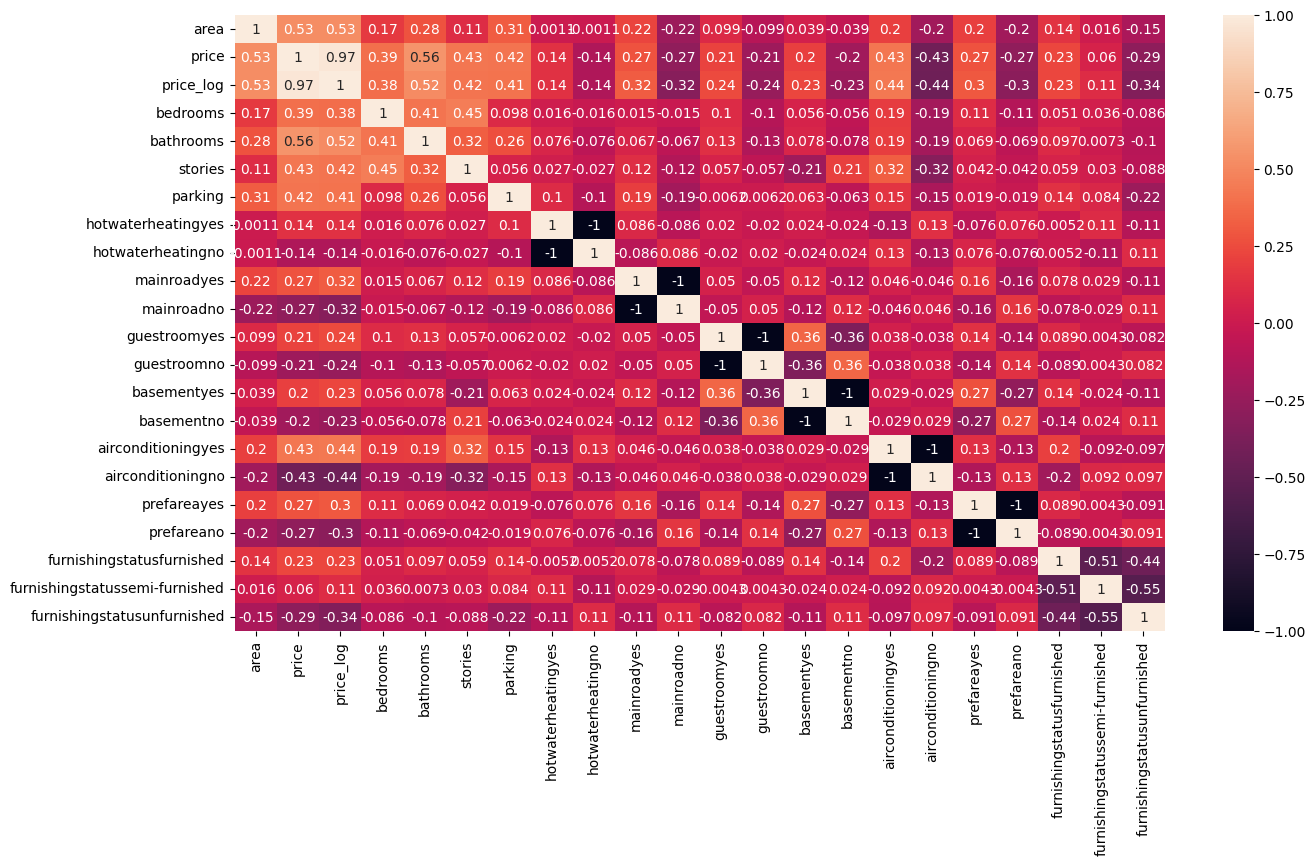

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(x.corr(),annot=True)

In [ ]:
x_train= prepare_x(df_train)
x_val= prepare_x(df_val)
x_test= prepare_x(df_test)

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred=model.predict(x_test)
mse_train=mean_squared_error(y_train,y_pred_train)
mse_test=mean_squared_error(y_test,y_pred)
print (mse_test)

2.547514115943084e-30
